In [21]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [22]:
df=pd.read_csv('academic.csv')

In [45]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.000000,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,46.939331,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.000000,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.000000,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.000000,50,12,50,No,Bad,Above-7,M


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    478 non-null    object 
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    object 
 4   GradeID                   480 non-null    object 
 5   SectionID                 480 non-null    object 
 6   Topic                     480 non-null    object 
 7   Semester                  480 non-null    object 
 8   Relation                  480 non-null    object 
 9   raisedhands               478 non-null    float64
 10  VisITedResources          480 non-null    int64  
 11  AnnouncementsView         480 non-null    int64  
 12  Discussion                480 non-null    int64  
 13  ParentAnsweringSurvey     480 non-null    object 
 14  Parentscho

In [25]:
df.shape

(480, 17)

In [26]:
print('Statistical information of Numerical Columns: \n',df.describe())

Statistical information of Numerical Columns: 
        raisedhands  VisITedResources  AnnouncementsView  Discussion
count   478.000000        480.000000         480.000000  480.000000
mean     46.939331         54.797917          37.918750   43.283333
std      31.375699         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.000000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     170.000000         99.000000          98.000000   99.000000


In [27]:
df.isnull().sum()

gender                      2
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 2
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [28]:
# Fill the missing values
df['gender'].fillna(df['gender'].mode(), inplace=True)
df['raisedhands'].fillna(df['raisedhands'].mean(), inplace=True)
print('Total Number of Null Values in Dataset: \n', df.isnull().sum())

Total Number of Null Values in Dataset: 
 gender                      2
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [35]:
def DetectOutlier(df,var):
# IQR method is used to deal with outliers
    Q1= df[var].quantile(0.25)
    Q3= df[var].quantile(0.75)
    IQR = Q3 - Q1
    high, low = Q3+1.5*IQR, Q1-1.5*IQR
    print("Highest allowed in variable:", var, high)
    print("lowest allowed in variable:", var, low)
    count = df[(df[var] > high) | (df[var] < low)][var].count()
    print('Total outliers in:',var,':',count)
    # new dataframe is created which contains outliers
    df1 = df[((df[var] < low) | (df[var] > high))] #these are outliers
    print('Outliers : \n', len(df1))
    print(df1.T)
    df = df[((df[var] >= low) & (df[var] <= high))] #now filter out data which is not outlier
    return(df)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

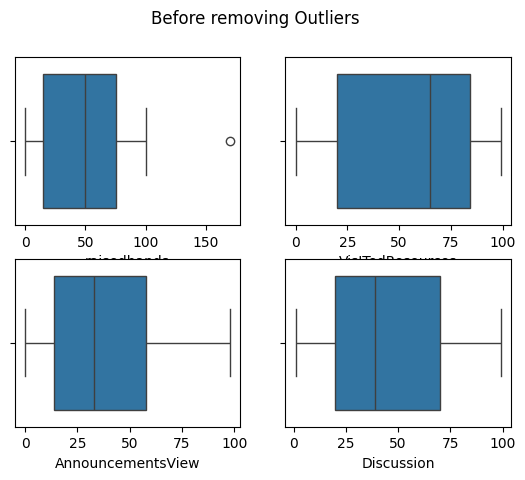

In [42]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Before removing Outliers')
sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
plt.show()

In [43]:
df = DetectOutlier(df, 'raisedhands')

Highest allowed in variable: raisedhands 165.0
lowest allowed in variable: raisedhands -75.0
Total outliers in: raisedhands : 1
Outliers : 
 1
                                    28
gender                               M
NationalITy                         KW
PlaceofBirth                    KuwaIT
StageID                   MiddleSchool
GradeID                           G-08
SectionID                            A
Topic                          Science
Semester                             F
Relation                        Father
raisedhands                      170.0
VisITedResources                    85
AnnouncementsView                   52
Discussion                          43
ParentAnsweringSurvey              Yes
ParentschoolSatisfaction          Good
StudentAbsenceDays             Under-7
Class                                M


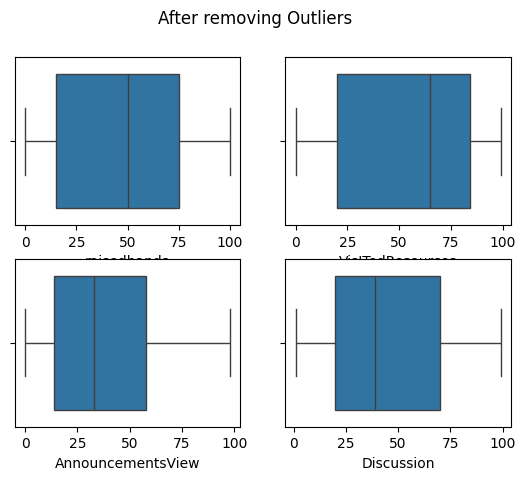

In [44]:
fig, axes = plt.subplots(2,2)
fig.suptitle('After removing Outliers')
sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
plt.show()